# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "/home/workspace/data/train.p"
validation_file="/home/workspace/data/valid.p"
testing_file = "/home/workspace/data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset (Show random samples from dataset)

In [3]:
#Import Libraries
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
#Read labels from csv file
dataset = pd.read_csv('signnames.csv')
name_values = dataset.iloc[:, [1]].values
print(len(name_values))


43


In [5]:
#Function for Plotting
def plot_random_sample(images,labels,cols=2):
    #Set axis and fig 
    fig, axs = plt.subplots(int(len(images)/cols),cols, figsize=(10, 20))
    axs = axs.ravel()
    i = 0
    #Loop for showing images
    for _ in range (len(images)):
    
        axs[i].imshow(images[i])
        axs[i].axis('off')
        axs[i].set_title(labels[i])
        i += 1
        axs[i].imshow(images[i])
        axs[i].axis('off')
        axs[i].set_title(labels[i])
        i += 1
        #Break loop when i equal to number of images
        if i==len(images):
            return 0

0

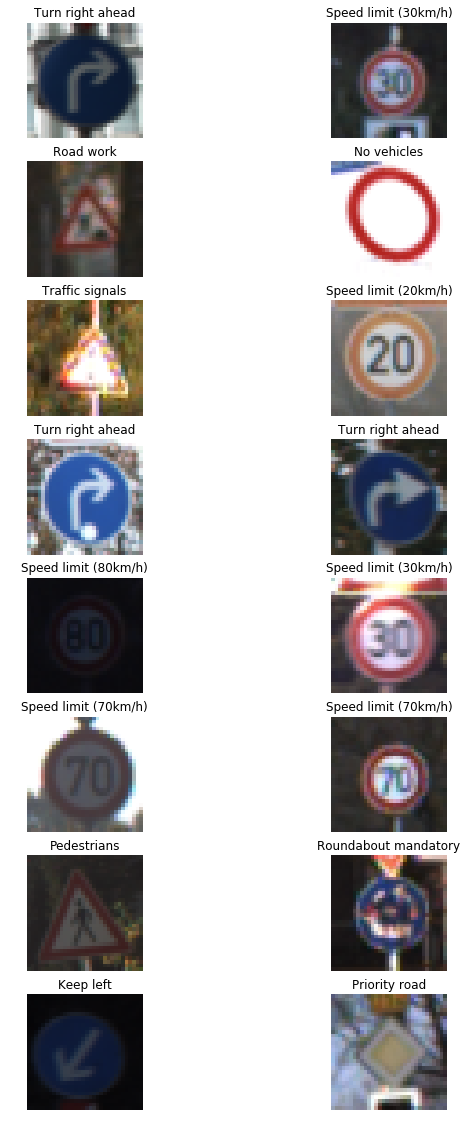

In [6]:
total_num_show=16 #It must be even number
cols=2  #Set the column. Must be even
#If the numbers above are chosen odd, the value return float
#and cause error

#Create array from random integers to select random images
newArray = np.random.randint(1, n_train, size=(1, total_num_show))

images_to_show = []
labels = []
#Create list from images and corresponding labels
for idx in range(total_num_show):
    images_to_show.append(X_train[newArray[0][idx]])
    labels.append(name_values[y_train[newArray[0][idx]]][0])
#Run function
plot_random_sample(images_to_show,labels,cols)


### Visualization of data (Create graph for number of classes)

In [7]:
# Import Counter lib
from collections import Counter
#Load csv file again with different name
ds_names = pd.read_csv('signnames.csv')
ds_names.set_index('ClassId',inplace=True)


def get_name_from_label(label):
    # Get label names by using pandas function 
    return ds_names.loc[label].SignName

#Create counter object from y_train

def show_class_graphs(data,data_name,data_count):
    counter = Counter(data)
    total_elements= list(counter.values())
    
    print("There are {} images in {} set and total number of images for each class: \n".format(data_count,data_name))
    for idx in range (len(total_elements)):
        print("{}: ".format(get_name_from_label(idx)),"{}".format(total_elements[idx])) 
    
    counts = pd.DataFrame(columns=['sign_label','Number of Images'],data=[(label, count) for label, count in counter.items()])
    counts['Labels'] = counts.sign_label.apply(get_name_from_label)
    ax = counts.plot(kind='barh',
                x='Labels',
                y='Number of Images',
                grid='on', 
                legend=False,
                title="{} Images Distribution".format(data_name),
                fontsize=15,
                figsize=(30,30)
                )

There are 12630 images in Test set and total number of images for each class: 

Speed limit (20km/h):  150
Speed limit (30km/h):  720
Speed limit (50km/h):  690
Speed limit (60km/h):  210
Speed limit (70km/h):  420
Speed limit (80km/h):  390
End of speed limit (80km/h):  690
Speed limit (100km/h):  480
Speed limit (120km/h):  390
No passing:  450
No passing for vehicles over 3.5 metric tons:  150
Right-of-way at the next intersection:  660
Priority road:  480
Yield:  90
Stop:  90
No vehicles:  60
Vehicles over 3.5 metric tons prohibited:  450
No entry:  720
General caution:  660
Dangerous curve to the left:  630
Dangerous curve to the right:  360
Double curve:  120
Bumpy road:  750
Slippery road:  450
Road narrows on the right:  150
Road work:  90
Traffic signals:  210
Pedestrians:  180
Children crossing:  150
Bicycles crossing:  120
Beware of ice/snow:  270
Wild animals crossing:  60
End of all speed and passing limits:  90
Turn right ahead:  150
Turn left ahead:  120
Ahead only:  90


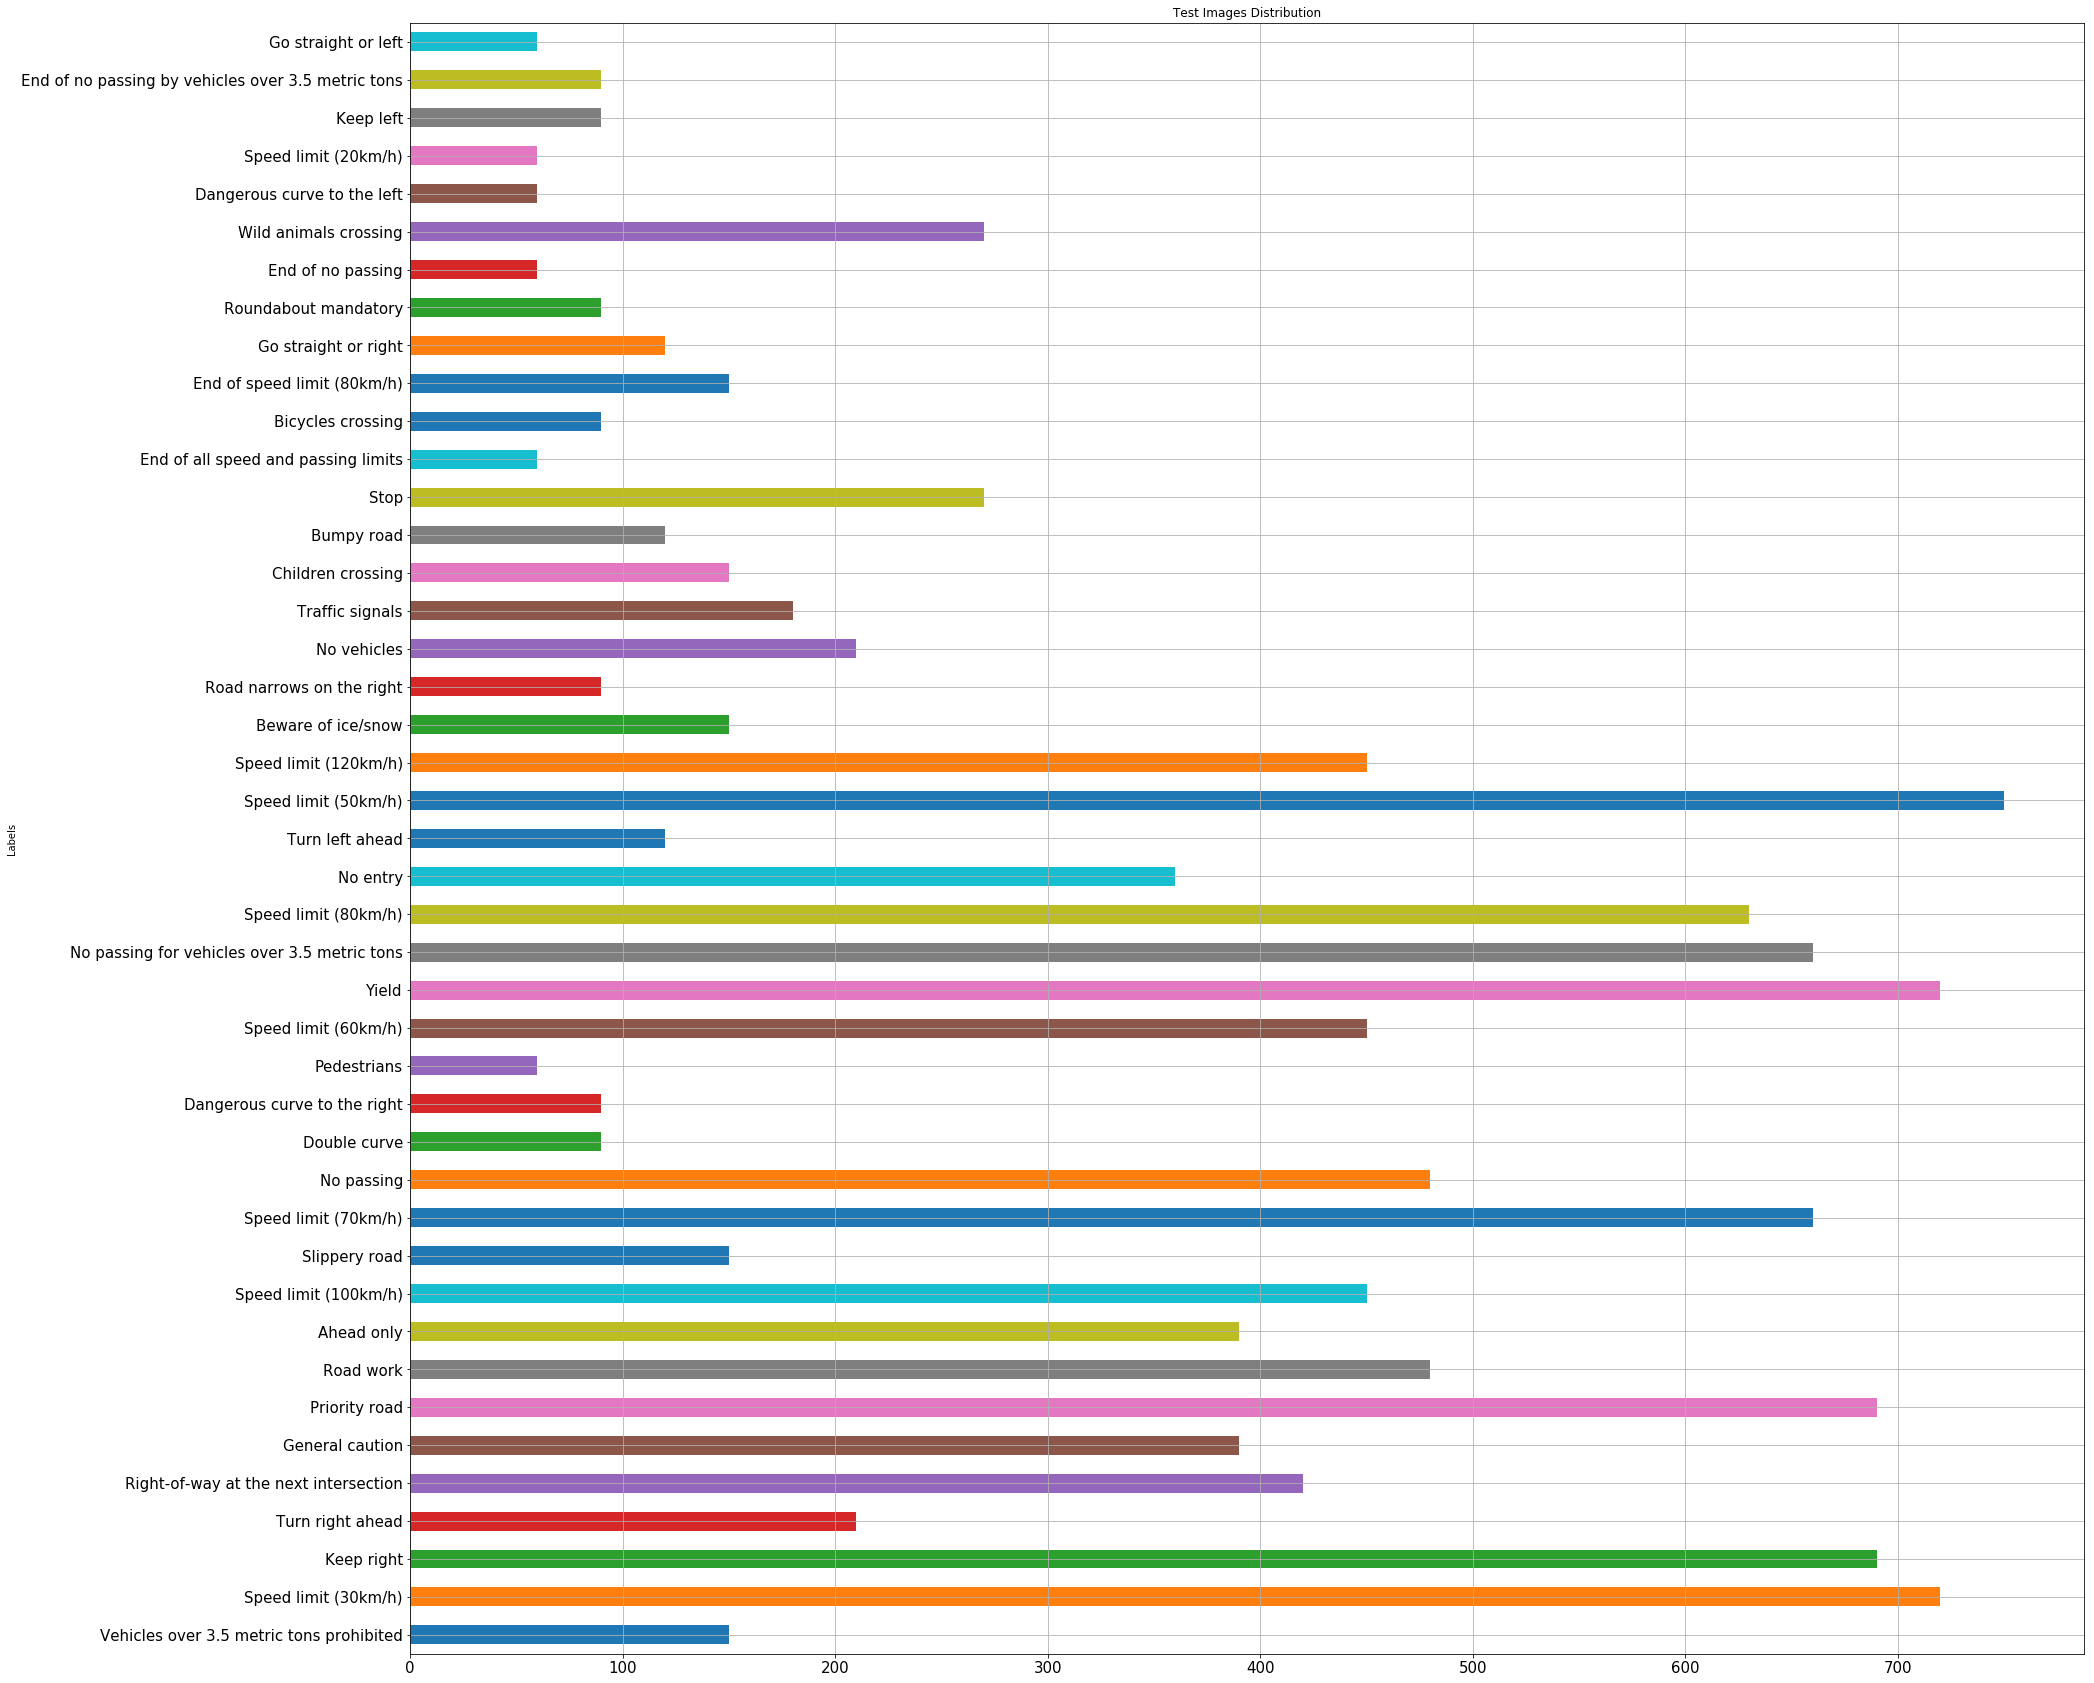

In [8]:
"""
Uncomment the line to look which data (test,train or validation) you want
"""
#show_class_graphs(y_train,"Train",n_train)
#show_class_graphs(y_valid,"Validation",n_validation)
show_class_graphs(y_test,"Test",n_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
import cv2
from sklearn import preprocessing
from numpy import asarray
from skimage.transform import rescale, resize, downscale_local_mean,rotate

In [10]:
def normalize(img):
    """
    Normalize images
    """
    #return  np.array(img/255.0, dtype=np.float32)
    return np.array((img-128.0)/128.0, dtype=np.float32)

def convertGray(img):
    """
    Convert images to gray 
    """
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def random_rotate_img(data,imgshp):
    """
    Rotate images by using opencv functions
    """
    c_x,c_y = int(imgshp.shape[0]/2), int(imgshp[0].shape[1]/2)
    def rotating(img,cx,cy):
        ang = 30.0*np.random.rand()-15
        Mat = cv2.getRotationMatrix2D((cx, cy), ang, 1.0)
        fin = cv2.warpAffine(img, Mat, img.shape[:2])
    return fin.reshape(32,32,1)
    rotats = [rotating(img) for img in data]
    
    return np.array(rotats)


def random_rotate(data):
    """
    Rotate images by using skimage funstion
    """
    def rotating_sec(img):
        ang  = 30.0*np.random.rand()-10
        rott = rotate(img, ang, resize=False, mode="edge")
        return rott.reshape(32,32,1)
    
    rotatings = [ rotating_sec(img) for img in data]
    
    return np.array(rotatings)


def sharpen_img(data):
    """
    Sharping images
    """
    
    def bluring(img):
        gb  = cv2.GaussianBlur(img, (7,7), 15.0)
        shp = cv2.addWeighted(img, 2, gb, -1, 0)
        return shp.reshape(32,32,1)
    
    sharps = [bluring(img) for img in data]
    return np.array(sharps) 

def horizontalFlip(data):
    """
    Horizontal flip
    """
    flips = [(cv2.flip(img, 1)).reshape(32,32,1) for img in data]
        
    return np.array(flips)
    
    

def normalize_gray_pipeline(data):
    """
    General Pipeline for normalize images and convert them to gray.
    
    """    
   
    def process(src):
            gray = convertGray(src)
            norm = normalize(gray)
            return norm.reshape(32,32,1)
    
    norms = [process(img) for img in data]
    return np.array(norms)
        
    

In [11]:
#Normalize and convert to gray all dataset (train,valid,test)
X_train_norm = normalize_gray_pipeline(X_train)
X_valid_norm = normalize_gray_pipeline(X_valid)
X_test_norm = normalize_gray_pipeline(X_test)

assert(len(X_train) == len(X_train_norm))
assert(len(X_valid) == len(X_valid_norm))
assert(len(X_test) == len(X_test_norm))

Text(0.5,1,'Normalized and Gray')

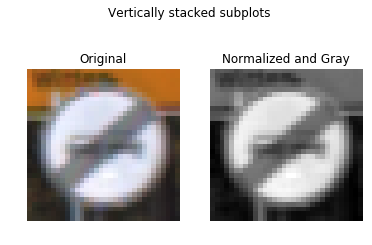

In [12]:
#Show
idx=141
fig, axs = plt.subplots(1,2)
fig.suptitle('Vertically stacked subplots')
axs[0].imshow(X_train[idx])
axs[0].axis('off')
axs[0].set_title("Original")
axs[1].imshow(X_train_norm[idx].squeeze(),cmap="gray")
axs[1].axis('off')
axs[1].set_title("Normalized and Gray")

In [13]:
#Flipping
X_train_flip = horizontalFlip(X_train_norm)
X_valid_flip = horizontalFlip(X_valid_norm)
X_test_flip  = horizontalFlip(X_test_norm)

#Sharping
X_train_sharp  =  sharpen_img(X_train_norm)
X_valid_sharp  =  sharpen_img(X_valid_norm)
X_test_sharp    =  sharpen_img(X_test_norm)

#Random rotating
X_train_rot  =  random_rotate(X_train_norm)
X_valid_rot  =  random_rotate(X_valid_norm)
X_test_rot    =  random_rotate(X_test_norm)


assert(len(X_train_norm) == len(X_train_flip))
assert(len(X_valid_norm) == len(X_valid_flip))
assert(len(X_test_norm) == len(X_test_flip))

assert(len(X_train_norm) == len(X_train_sharp))
assert(len(X_valid_norm) == len(X_valid_sharp))
assert(len(X_test_norm) == len(X_test_sharp))

assert(len(X_train_norm) == len(X_train_rot))
assert(len(X_valid_norm) == len(X_valid_rot))
assert(len(X_test_norm) == len(X_test_rot))

In [14]:
#Concatenating
data1_train= np.concatenate([X_train_norm, X_train_flip])
data2_train = np.concatenate([data1_train, X_train_sharp])
X_train_final = np.concatenate([data2_train, X_train_rot])

data1_valid = np.concatenate([X_valid_norm, X_valid_flip])
data2_valid = np.concatenate([data1_valid, X_valid_sharp])
X_valid_final = np.concatenate([data2_valid, X_valid_rot])

data1_test = np.concatenate([X_test_norm, X_test_flip])
data2_test = np.concatenate([data1_test, X_test_sharp])
X_test_final = np.concatenate([data2_test, X_test_rot])


print("Length of final dataset and total of augmented images (TRAIN)")
print(len(X_train_final))

print(".......")
print("Length of final dataset and total of augmented images (VALID)")
print(len(X_valid_final))

print(".......")
print("Length of final dataset and total of augmented images (TEST)")
print(len(X_test_final))



Length of final dataset and total of augmented images (TRAIN)
139196
.......
Length of final dataset and total of augmented images (VALID)
17640
.......
Length of final dataset and total of augmented images (TEST)
50520


In [15]:
y_train_final = np.concatenate([y_train, y_train,y_train,y_train])
y_valid_final = np.concatenate([y_valid, y_valid,y_valid,y_valid])
y_test_final = np.concatenate([y_test, y_test,y_test,y_test])


assert(len(y_train_final) == len(X_train_final))
assert(len(y_valid_final) == len(X_valid_final))
assert(len(y_test_final) == len(X_test_final))


(-0.5, 31.5, 31.5, -0.5)

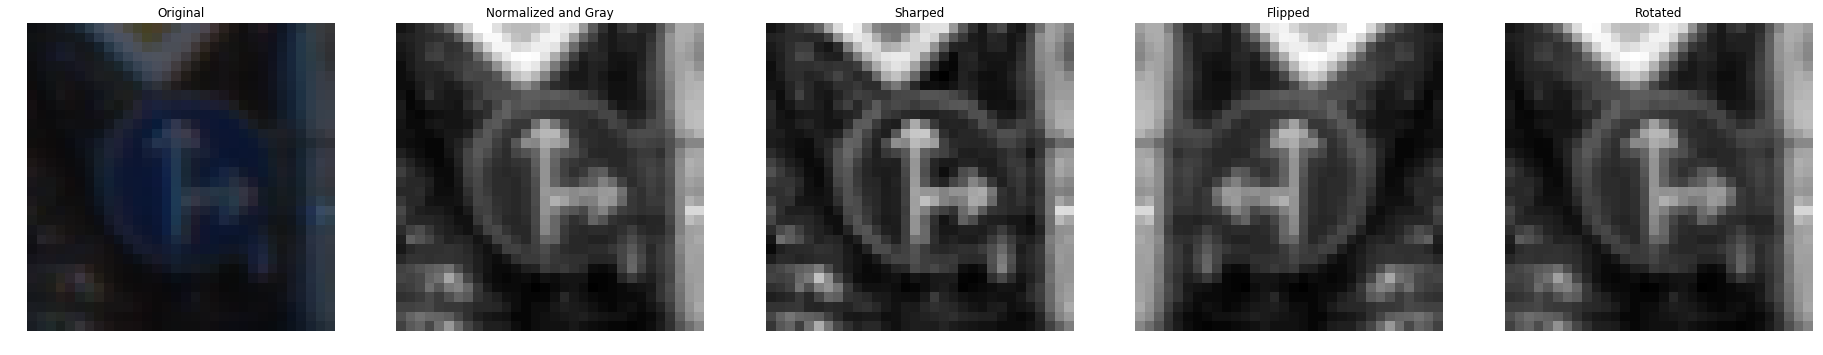

In [16]:
#Plotting Samples

#Set axis and fig 
fig, axs = plt.subplots(1,5, figsize=(32, 32))
axs = axs.ravel()

i=1003

axs[0].imshow(X_train[i].squeeze(),cmap="gray")
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(X_train_norm[i].squeeze(),cmap="gray")
axs[1].set_title("Normalized and Gray")
axs[1].axis('off') 

axs[2].imshow(X_train_sharp[i].squeeze(),cmap="gray")
axs[2].set_title("Sharped")
axs[2].axis('off') 

axs[3].imshow(X_train_flip[i].squeeze(),cmap="gray")
axs[3].set_title("Flipped")
axs[3].axis('off')

axs[4].imshow(X_train_rot[i].squeeze(),cmap="gray")
axs[4].set_title("Rotated")
axs[4].axis('off')  

### Model Architecture

In [17]:
from sklearn.utils import shuffle

X_train_final, y_train_final = shuffle(X_train_final, y_train_final)


In [18]:
print(X_train_final.shape)
print(y_train_final.shape)

(139196, 32, 32, 1)
(139196,)


In [19]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 25
BATCH_SIZE = 128

In [20]:
#This is classic LeNet architecture which I wont use. 
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
            
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    #Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [21]:
# I created this model. It is based on LeNet. I just added 1 conv, 2 fully connected layer and dropout layer
# I rearranged parameters and pooling layers

def vefakNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b 
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Layer 3: Convolutional. Output = 8x8x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b 
    # Activation.
    conv3 = tf.nn.relu(conv3)
    # Pooling. Input = 8x8x32. Output = 4x4x32.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
      

    # Flatten. Input = 8x8x32. Output = 512.
    fc0   = flatten(conv3)
    
            
    # Layer 4: Fully Connected. Input = 512. Output = 256.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1 = tf.nn.relu(fc1)
    #Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 5: Fully Connected. Input = 256. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(128))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    #Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 6: Fully Connected. Input = 128. Output = 64.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 64), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(64))
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b
    # Activation.
    fc3    = tf.nn.relu(fc3)
    #Dropout
    fc3 = tf.nn.dropout(fc3, keep_prob)
    
    # Layer 7: Fully Connected. Input = 64. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

In [22]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [23]:

rate = 0.001
logits = vefakNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_final)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_final, y_train_final = shuffle(X_train_final, y_train_final)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_final[offset:end], y_train_final[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid_final, y_valid_final)
        test_accuracy = evaluate(X_train_final, y_train_final)
        
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Test Accuracy = 0.841
Validation Accuracy = 0.791

EPOCH 2 ...
Test Accuracy = 0.923
Validation Accuracy = 0.861

EPOCH 3 ...
Test Accuracy = 0.954
Validation Accuracy = 0.900

EPOCH 4 ...
Test Accuracy = 0.968
Validation Accuracy = 0.923

EPOCH 5 ...
Test Accuracy = 0.973
Validation Accuracy = 0.930

EPOCH 6 ...
Test Accuracy = 0.981
Validation Accuracy = 0.941

EPOCH 7 ...
Test Accuracy = 0.985
Validation Accuracy = 0.943

EPOCH 8 ...
Test Accuracy = 0.985
Validation Accuracy = 0.950

EPOCH 9 ...
Test Accuracy = 0.989
Validation Accuracy = 0.951

EPOCH 10 ...
Test Accuracy = 0.990
Validation Accuracy = 0.952

EPOCH 11 ...
Test Accuracy = 0.988
Validation Accuracy = 0.949

EPOCH 12 ...
Test Accuracy = 0.992
Validation Accuracy = 0.957

EPOCH 13 ...
Test Accuracy = 0.993
Validation Accuracy = 0.959

EPOCH 14 ...
Test Accuracy = 0.992
Validation Accuracy = 0.955

EPOCH 15 ...
Test Accuracy = 0.993
Validation Accuracy = 0.956

EPOCH 16 ...
Test Accuracy = 0.994
V

In [25]:
#Test with Normalized X_test
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

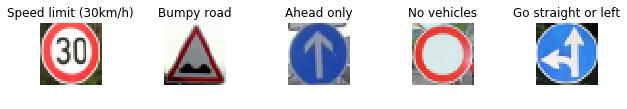

In [26]:
#Show Original
import glob
import cv2

my_images = sorted(glob.glob('./test_signs/*.png'))
my_labels = np.array([1, 22, 35, 15, 37])

test_images = []
test_labels = []
for my_image in my_images:
    img = cv2.cvtColor(cv2.imread(my_image), cv2.COLOR_BGR2RGB)
    test_images.append(img)

for idx in my_labels:
    test_labels.append(ds_names.loc[idx].SignName)

fig, axs = plt.subplots(1,5, figsize=(10, 20))
axs = axs.ravel()
plt.subplots_adjust(wspace=1, hspace=None)
i = 0
#Loop for showing images
for _ in range (len(test_images)):

    axs[i].imshow(test_images[i])
    axs[i].axis('off')
    axs[i].set_title(test_labels[i])
    i += 1
  


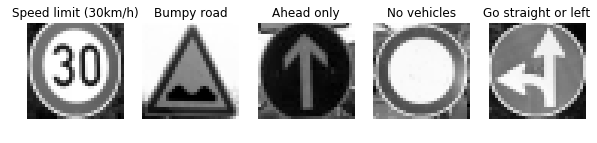

In [27]:
test_images_gray = []
test_images_gray= normalize_gray_pipeline(test_images)

fig, axs = plt.subplots(1,5, figsize=(10, 20))
axs = axs.ravel()
i = 0
for _ in range (len(test_images_gray)):

    axs[i].imshow(test_images_gray[i].squeeze(),cmap="gray")
    axs[i].axis('off')
    axs[i].set_title(test_labels[i])
    i += 1
  

### Predict the Sign Type for Each Image

In [28]:
#This prediction get all images and give overall accuracy
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
#   saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(test_images_gray, my_labels)
    results = sess.run(tf.argmax(logits, 1), {x : test_images_gray, keep_prob:1.0})
    results = [get_name_from_label(n) for n in results]
    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))
    print(results)

INFO:tensorflow:Restoring parameters from ./lenet
My Data Set Accuracy = 0.800
['Speed limit (50km/h)', 'Bumpy road', 'Ahead only', 'No vehicles', 'Go straight or left']


### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
my_single_item_array = []
my_single_item_label_array = []

for i in range(5):
    my_single_item_array.append(test_images_gray[i])
    my_single_item_label_array.append(my_labels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        saver.restore(sess, "./lenet")
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()

INFO:tensorflow:Restoring parameters from ./lenet
Image 1
Image Accuracy = 0.000

INFO:tensorflow:Restoring parameters from ./lenet
Image 2
Image Accuracy = 0.500

INFO:tensorflow:Restoring parameters from ./lenet
Image 3
Image Accuracy = 0.667

INFO:tensorflow:Restoring parameters from ./lenet
Image 4
Image Accuracy = 0.750

INFO:tensorflow:Restoring parameters from ./lenet
Image 5
Image Accuracy = 0.800



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [30]:
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
            axs[index].set_title(labels[index],fontsize=15)
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

INFO:tensorflow:Restoring parameters from ./lenet


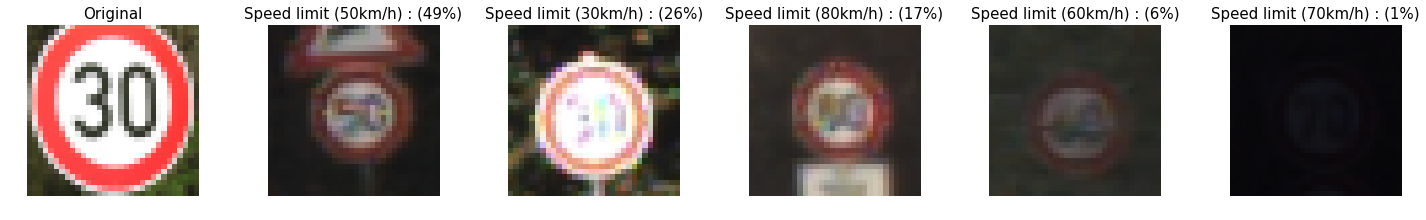

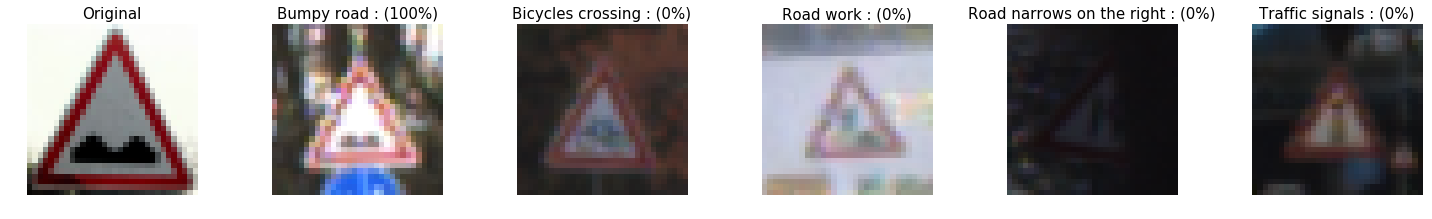

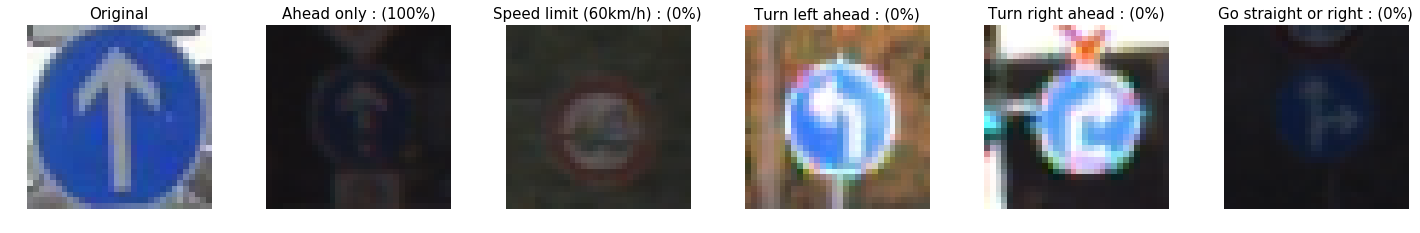

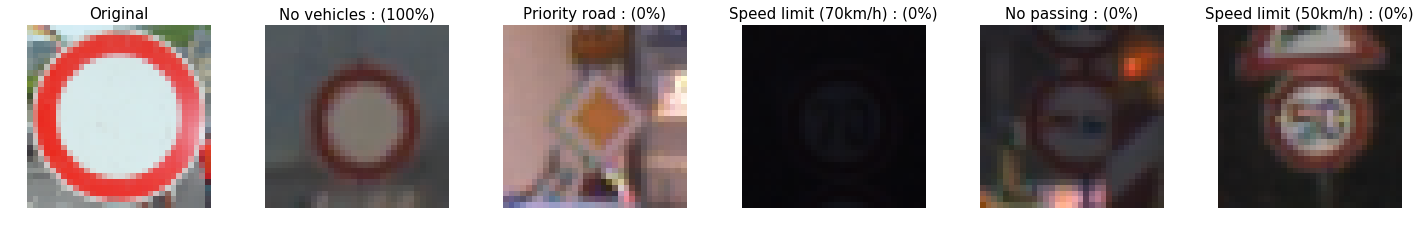

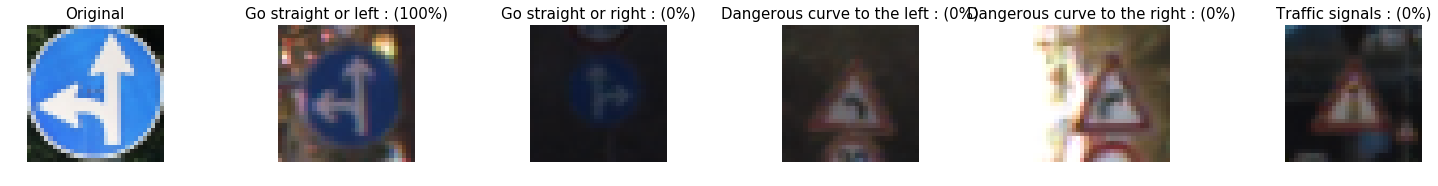

In [31]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: test_images_gray, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: test_images_gray, keep_prob: 1.0})
   

    for i in range(5):
        figures = {}
        labels = {}
        
        figures[0] = test_images[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = '{} : ({:.0f}%)'.format(get_name_from_label(my_top_k.indices[i][j]), 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
 
        plot_figures(figures, 1, 6, labels)


### Challenging Prediction Performance

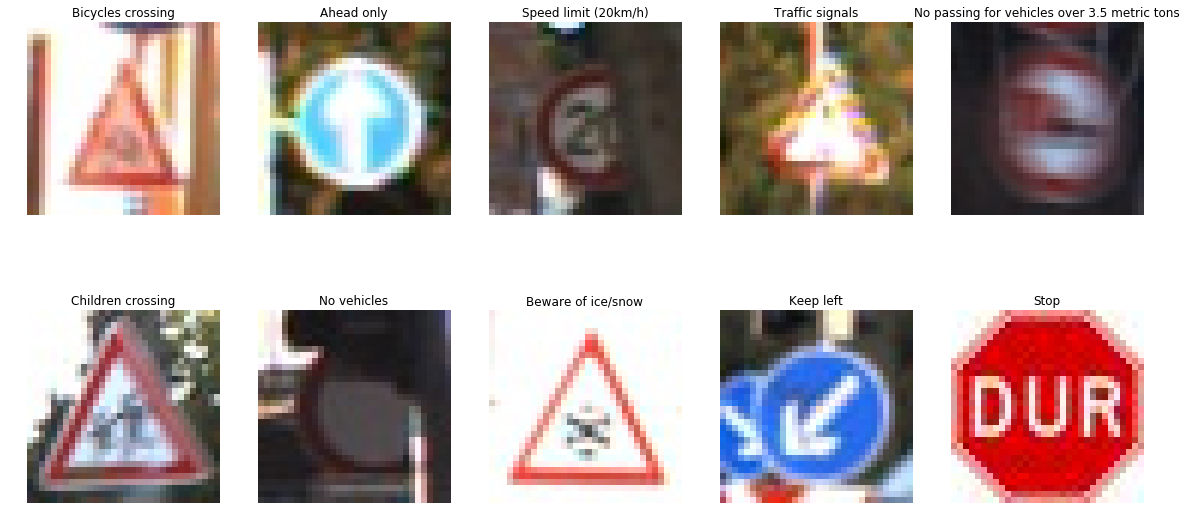

In [32]:
#Show Original
import glob
import cv2

new_imgs = sorted(glob.glob('./new_test_signs/*.jpg'))

new_labels = np.array([29, 35, 0, 26, 10, 28, 15, 30, 39, 14])

new_test_images = []
new_test_labels = []
for imgs in new_imgs:
    img = cv2.cvtColor(cv2.imread(imgs), cv2.COLOR_BGR2RGB)
    new_test_images.append(img)
    
for idx in new_labels:
    new_test_labels.append(ds_names.loc[idx].SignName)

fig, axs = plt.subplots(2,5, figsize=(20,20))
axs = axs.ravel()
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
i = 0
#Loop for showing images
for _ in range (len(new_test_images)):

    axs[i].imshow(new_test_images[i])
    axs[i].set_title(new_test_labels[i])
    axs[i].axis('off')
    i += 1
    
  

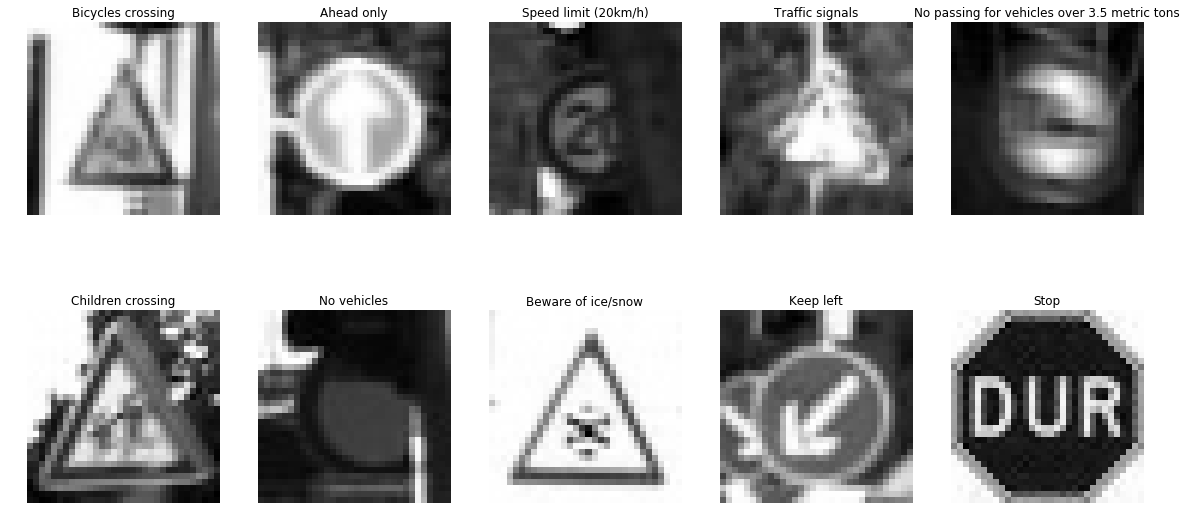

In [33]:
new_test_images_gray = []
new_test_images_gray= normalize_gray_pipeline(new_test_images)

fig, axs = plt.subplots(2,5, figsize=(20,20))
axs = axs.ravel()
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
i = 0
for _ in range (len(new_test_images_gray)):

    axs[i].imshow(new_test_images_gray[i].squeeze(),cmap="gray")
    axs[i].axis('off')
    axs[i].set_title(new_test_labels[i])
    i += 1

    

In [34]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
my_single_item_array = []
my_single_item_label_array = []

for i in range(10):
    my_single_item_array.append(new_test_images_gray[i])
    my_single_item_label_array.append(new_labels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        saver.restore(sess, "./lenet")
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array)
        print('Image {}'.format(new_test_labels[i]))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()

INFO:tensorflow:Restoring parameters from ./lenet
Image Bicycles crossing
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image Ahead only
Image Accuracy = 1.000

INFO:tensorflow:Restoring parameters from ./lenet
Image Speed limit (20km/h)
Image Accuracy = 0.667

INFO:tensorflow:Restoring parameters from ./lenet
Image Traffic signals
Image Accuracy = 0.750

INFO:tensorflow:Restoring parameters from ./lenet
Image No passing for vehicles over 3.5 metric tons
Image Accuracy = 0.800

INFO:tensorflow:Restoring parameters from ./lenet
Image Children crossing
Image Accuracy = 0.833

INFO:tensorflow:Restoring parameters from ./lenet
Image No vehicles
Image Accuracy = 0.857

INFO:tensorflow:Restoring parameters from ./lenet
Image Beware of ice/snow
Image Accuracy = 0.750

INFO:tensorflow:Restoring parameters from ./lenet
Image Keep left
Image Accuracy = 0.778

INFO:tensorflow:Restoring parameters from ./lenet
Image Stop
Image Accuracy = 0.800



INFO:tensorflow:Restoring parameters from ./lenet


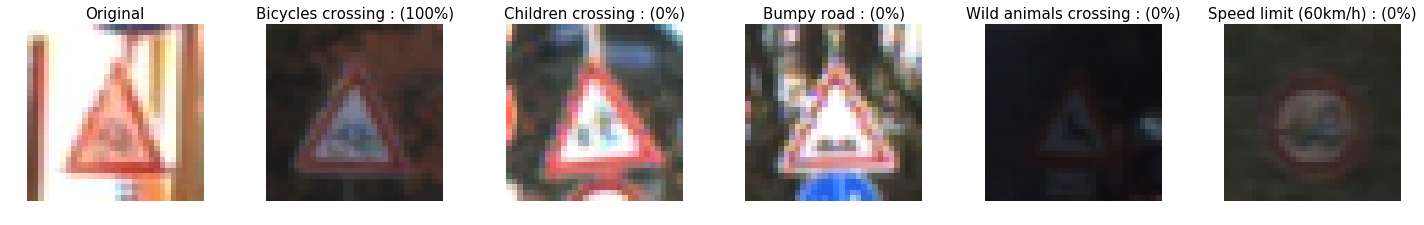

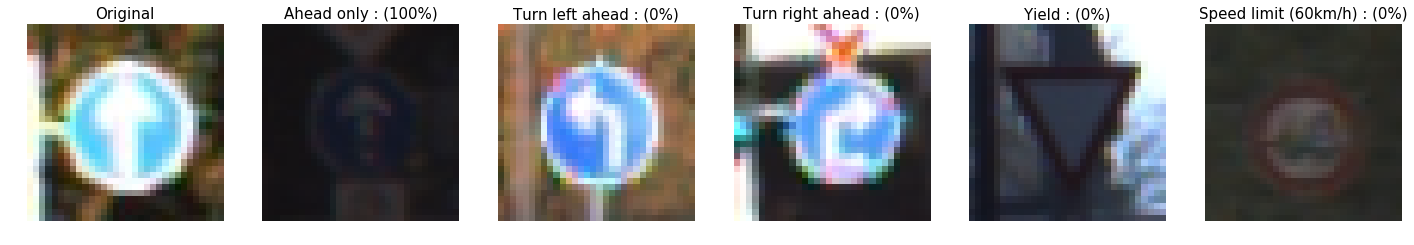

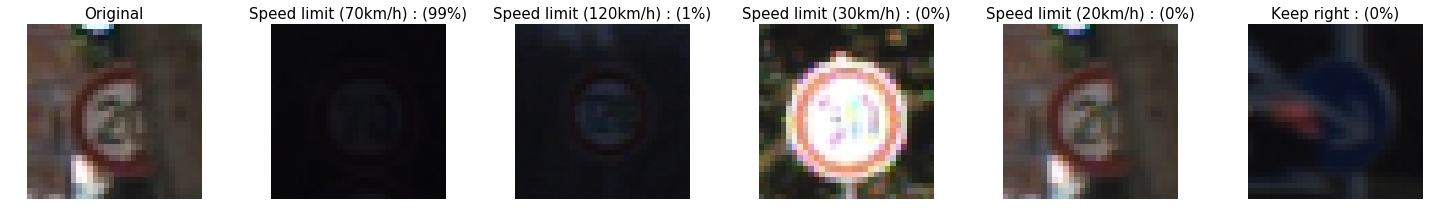

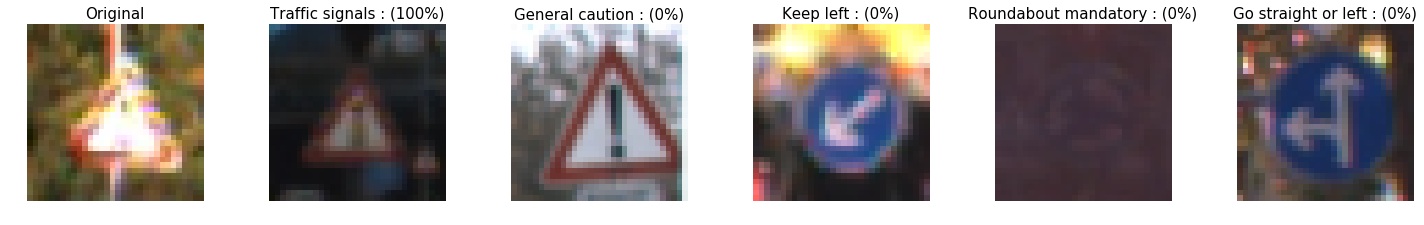

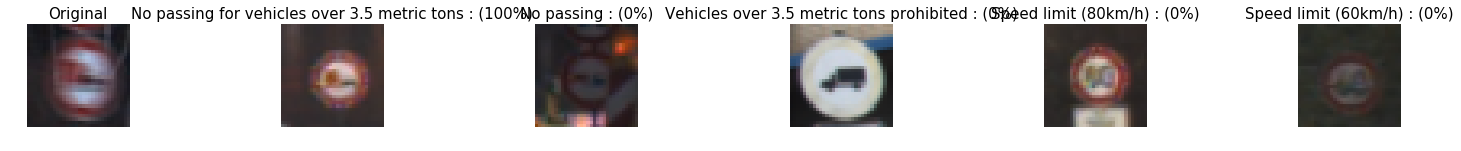

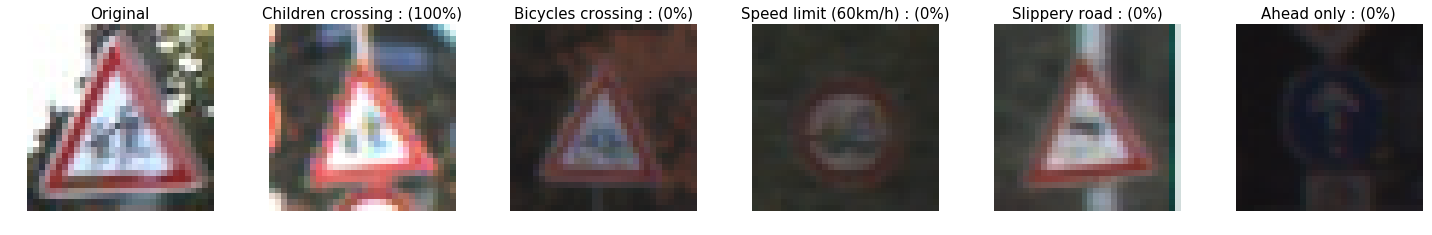

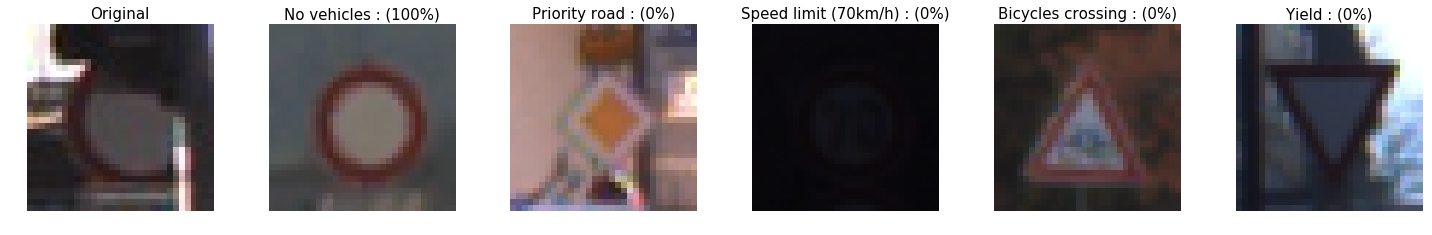

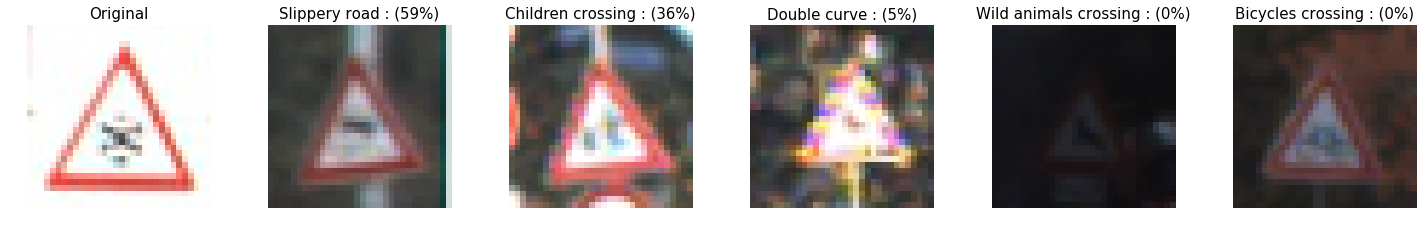

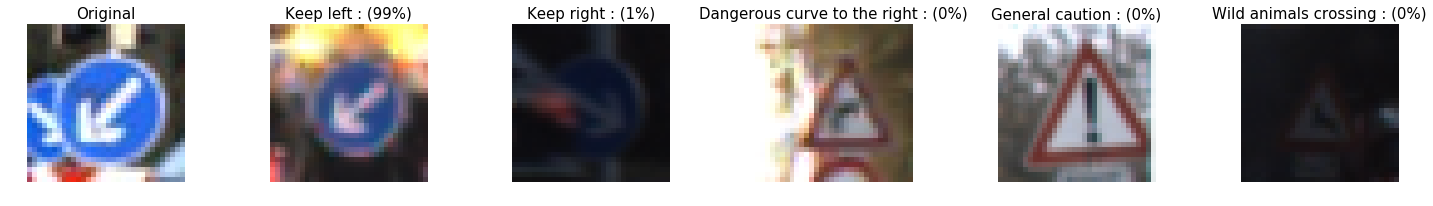

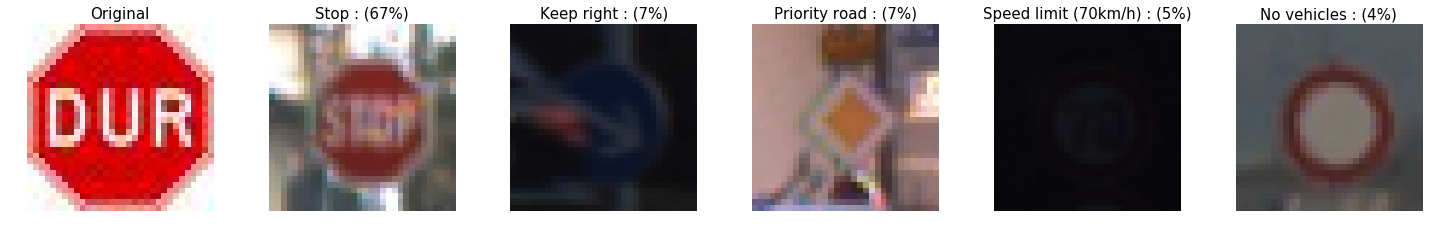

In [35]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: new_test_images_gray, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: new_test_images_gray, keep_prob: 1.0})
   

    for i in range(10):
        figures = {}
        labels = {}
        
        figures[0] = new_test_images[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = '{} : ({:.0f}%)'.format(get_name_from_label(my_top_k.indices[i][j]), 100*my_top_k[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == my_top_k[1][i][j])[0]].squeeze()
 
        plot_figures(figures, 1, 6, labels)